# Linear regression

For today's lecture, I am using the 3rd Chapter of [Introduction to Statistical Learning](https://www-bcf.usc.edu/~gareth/ISL/) by Gareth et.al., 3rd Chapter of [Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/) by Hastie et.al. and the 3rd Chapter of [Pattern Recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf) by Bishop.

## Ordinary (least squares) regression

Assume we have a data set consisting of numerical pairs $(x_i,y_i)$

Education,Income
10.00000,26.65884
10.40134,27.30644
10.84281,22.13241
11.24415,21.16984
11.64548,15.19263
12.08696,26.39895


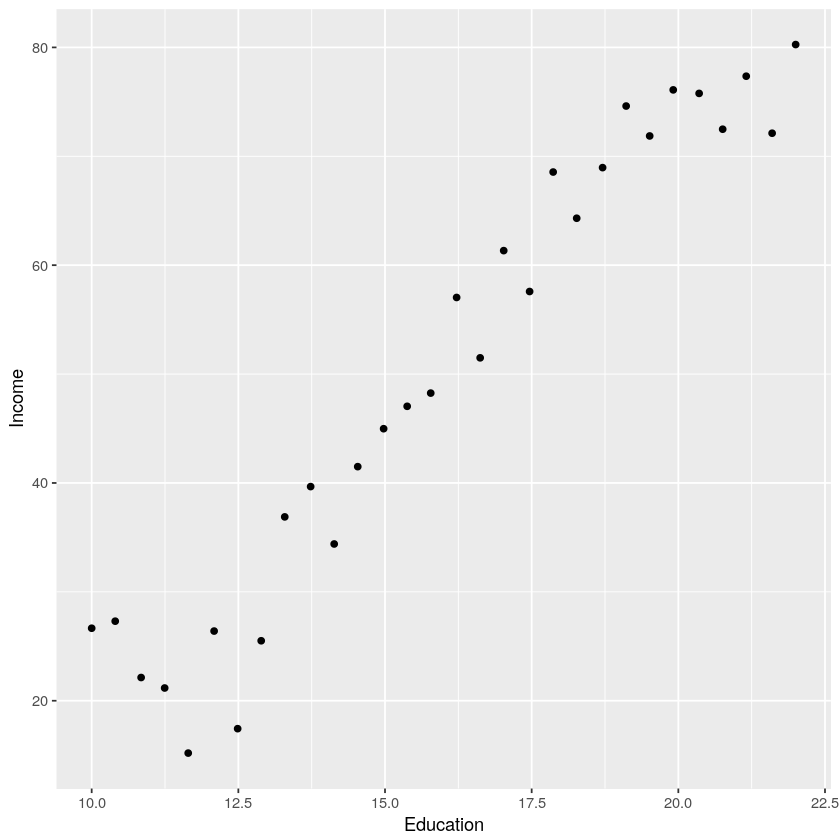

In [71]:
X <- read.csv("./data/Income1.csv")[,2:3]
head(X)
ggplot(Y, aes(Education, Income)) + geom_point()

Assume also that upon some inspection, we guess that there is a linear dependence between $x_i$'s and $y_i$'s of the form
$$  y_i \approx \alpha x_i + \beta + \epsilon $$
In this scenario, we assume the $y_i$ values depend on $x_i$ values functionally, moreover, we also assume that the functional relationship is linear. In such cases, $y_i$'s are called *dependent variable* and $x_i$'s are called *independent variables*.

Our task is then to calculate the best fitting $\alpha$ and $\beta$ for this set.

Education,Income,Predicted
10.00000,26.65884,16.54857
10.40134,27.30644,18.79586
10.84281,22.13241,21.26787
11.24415,21.16984,23.51515
11.64548,15.19263,25.76244
12.08696,26.39895,28.23445


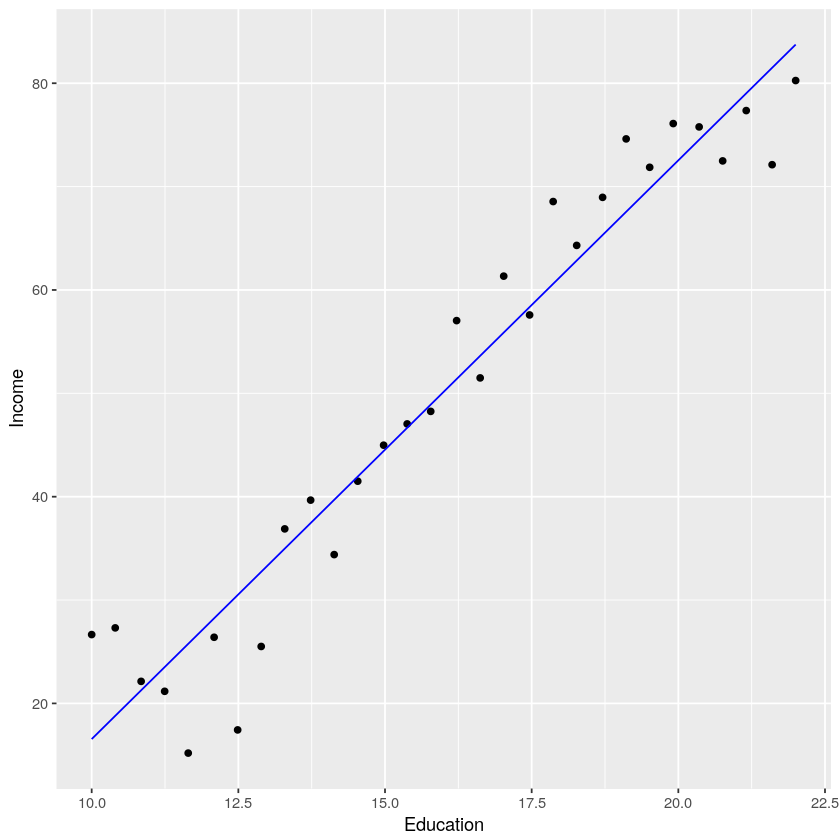

In [72]:
model <- lm(Income ~ Education, data=X)
X <- cbind(X,Predicted = model$fitted.values)
head(X)
ggplot(Y, aes(Education, Income)) + geom_point() + geom_line(aes(Education,Predicted),color="blue")

## How and why does linear regression works?

The question we need to ask is, in linear regression what is our **fit criteria** or what is our **error function**?

$$ 
   RSS(\alpha,\beta) = \sum_{i=1}^N (\alpha x_i + \beta - y_i)^2 
$$
The (ordinary least square) regression finds $\alpha$ and $\beta$ that minimizes this function $RSS(\alpha,\beta)$:
$$ \alpha = \frac{\sum_i (x_i - \overline{x})(y_i - \overline{y})}{\sum_i (x_i - \overline{x})^2}, \qquad \beta = \overline{y} - \alpha \overline{x} $$

## How do we judge if the model fit?

The $R^2$-statistic tells us how much of the error is explained by the independent variable:

$$ RSE(\alpha,\beta) = \sqrt{\frac{RSS(\alpha,\beta)}{n-2}}, \qquad R^2 = 1 - \frac{RSE}{RSS} $$


In [73]:
summary(model)


Call:
lm(formula = Income ~ Education, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.046  -2.293   0.472   3.288  10.110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -39.4463     4.7248  -8.349  4.4e-09 ***
Education     5.5995     0.2882  19.431  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.653 on 28 degrees of freedom
Multiple R-squared:  0.931,	Adjusted R-squared:  0.9285 
F-statistic: 377.6 on 1 and 28 DF,  p-value: < 2.2e-16


There is also the issue of whether we can statistically trust the values of $\alpha$ and $\beta$ we calculated. 

In [69]:
x <- rnorm(100)
y <- 2*x + 1.0 + rnorm(100,mean=0.0,sd=0.05)
z <- runif(100)

summary(lm(y~x))
summary(lm(y~z))


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15726 -0.03849 -0.00049  0.03663  0.11525 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.987744   0.005214   189.4   <2e-16 ***
x           2.006369   0.005086   394.5   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05214 on 98 degrees of freedom
Multiple R-squared:  0.9994,	Adjusted R-squared:  0.9994 
F-statistic: 1.556e+05 on 1 and 98 DF,  p-value: < 2.2e-16



Call:
lm(formula = y ~ z)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6135 -1.2358 -0.1363  1.2639  5.3862 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.5737     0.4465   1.285    0.202
z             0.8120     0.7448   1.090    0.278

Residual standard error: 2.066 on 98 degrees of freedom
Multiple R-squared:  0.01198,	Adjusted R-squared:  0.001901 
F-statistic: 1.189 on 1 and 98 DF,  p-value: 0.2783


## Multiple linear regression

This time the data set we have is of the form $(x_{1i},\ldots,x_{mi},y_i)$ and we assume we have a functional relation of the form
$$ y_i \approx \beta + \sum_j \alpha_j x_{ji} $$

In [74]:
X <- read.csv("data/Income2.csv")[,2:4]
model <- lm(Income ~ Seniority + Education , data=X)
X <- cbind(X, Predicted=model$fitted.values)
head(X)
summary(model)

Education,Seniority,Income,Predicted
21.58621,113.1034,99.91717,96.72760
18.27586,119.3103,92.57913,78.28417
12.06897,100.6897,34.67873,38.47238
17.03448,187.5862,78.70281,82.76741
19.93103,20.0000,68.00992,70.87600
18.27586,26.2069,71.50449,62.19073



Call:
lm(formula = Income ~ Seniority + Education, data = X)

Residuals:
   Min     1Q Median     3Q    Max 
-9.113 -5.718 -1.095  3.134 17.235 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -50.08564    5.99878  -8.349 5.85e-09 ***
Seniority     0.17286    0.02442   7.079 1.30e-07 ***
Education     5.89556    0.35703  16.513 1.23e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.187 on 27 degrees of freedom
Multiple R-squared:  0.9341,	Adjusted R-squared:  0.9292 
F-statistic: 191.4 on 2 and 27 DF,  p-value: < 2.2e-16


## Which of the independent variables explain the dependent variable better?

In [76]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Seniority,1,5684.540,5684.53975,110.0637,5.026076e-11
Education,1,14082.781,14082.78143,272.6700,1.230258e-15
Residuals,27,1394.488,51.64771,NA,NA


In [79]:
X[,1] <- X[,1]*10
X[,2] <- X[,2]*0.1
model <- lm(Income ~ Seniority + Education , data=X)
summary(model)
anova(model)


Call:
lm(formula = Income ~ Seniority + Education, data = X)

Residuals:
   Min     1Q Median     3Q    Max 
-9.113 -5.718 -1.095  3.134 17.235 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -50.0856     5.9988  -8.349 5.85e-09 ***
Seniority     1.7286     0.2442   7.079 1.30e-07 ***
Education     0.5896     0.0357  16.513 1.23e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.187 on 27 degrees of freedom
Multiple R-squared:  0.9341,	Adjusted R-squared:  0.9292 
F-statistic: 191.4 on 2 and 27 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Seniority,1,5684.540,5684.53975,110.0637,5.026076e-11
Education,1,14082.781,14082.78143,272.6700,1.230258e-15
Residuals,27,1394.488,51.64771,NA,NA


## Selecting a smaller model

In case we have many independent variables we may want to reduce the number of these variables:



In [80]:
wine <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",header = FALSE)
head(wine)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


,V2,V3,V4,V5,V6,V7
V2,1.00000000,0.09439694,0.2115446,-0.31023514,0.27079823,0.2891011
V3,0.09439694,1.00000000,0.1640455,0.28850040,-0.05457510,-0.3351670
V4,0.21154460,0.16404547,1.0000000,0.44336719,0.28658669,0.1289795
V5,-0.31023514,0.28850040,0.4433672,1.00000000,-0.08333309,-0.3211133
V6,0.27079823,-0.05457510,0.2865867,-0.08333309,1.00000000,0.2144012
V7,0.28910112,-0.33516700,0.1289795,-0.32111332,0.21440123,1.0000000


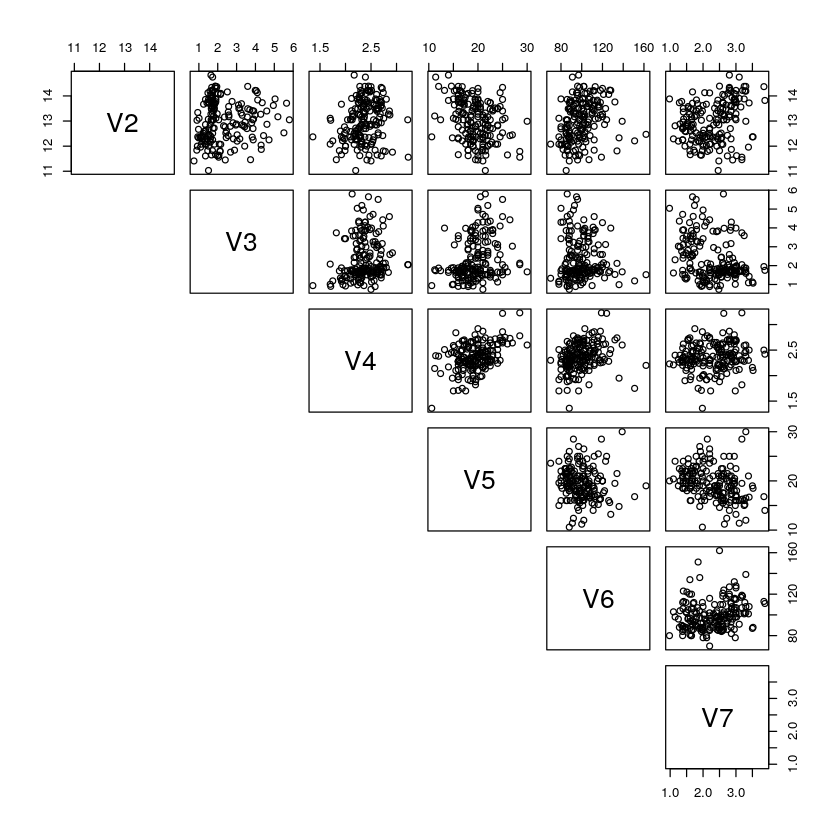

In [112]:
pairs(wine[,2:7], lower.panel = NULL)
cor(wine[,2:7])

In [83]:
X <- wine[,2:14]
model <- lm(V2 ~ ., data=X)
summary(model)
anova(model)


Call:
lm(formula = V2 ~ ., data = X)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.45180 -0.30646 -0.02277  0.33195  1.54407 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.107e+01  5.963e-01  18.567  < 2e-16 ***
V3           1.316e-01  4.528e-02   2.907  0.00415 ** 
V4           1.379e-01  2.169e-01   0.636  0.52585    
V5          -3.779e-02  1.781e-02  -2.122  0.03537 *  
V6           4.179e-06  3.359e-03   0.001  0.99901    
V7           5.208e-02  1.340e-01   0.389  0.69796    
V8           9.125e-03  1.069e-01   0.085  0.93211    
V9          -2.078e-01  4.336e-01  -0.479  0.63242    
V10         -1.525e-01  9.823e-02  -1.552  0.12249    
V11          1.630e-01  2.744e-02   5.941 1.63e-08 ***
V12          2.169e-01  2.811e-01   0.772  0.44144    
V13          1.608e-01  1.097e-01   1.466  0.14462    
V14          1.016e-03  1.999e-04   5.081 1.01e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Resid

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
V3,1,1.03947870,1.03947870,3.6174328,5.891948e-02
V4,1,4.60809721,4.60809721,16.0363863,9.376747e-05
V5,1,26.88057017,26.88057017,93.5455977,8.259133e-18
V6,1,1.72036650,1.72036650,5.9869531,1.546107e-02
V7,1,1.92765598,1.92765598,6.7083298,1.045476e-02
V8,1,0.23823346,0.23823346,0.8290632,3.638718e-01
V9,1,0.18612028,0.18612028,0.6477070,4.220918e-01
V10,1,0.04113766,0.04113766,0.1431609,7.056450e-01
V11,1,22.97427273,22.97427273,79.9515063,7.477740e-16
V12,1,1.09559592,1.09559592,3.8127233,5.255679e-02


In [91]:
model <- lm(V2 ~ V3 + V4 + V5 + V11 + V12 + V13, data=X)
summary(model)


Call:
lm(formula = V2 ~ V3 + V4 + V5 + V11 + V12 + V13, data = X)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58535 -0.37515  0.04868  0.40930  1.39848 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.77263    0.54437  19.789  < 2e-16 ***
V3           0.12582    0.04779   2.633  0.00925 ** 
V4           0.54316    0.19598   2.771  0.00620 ** 
V5          -0.08511    0.01641  -5.185 6.04e-07 ***
V11          0.22295    0.02491   8.951 5.72e-16 ***
V12          0.51823    0.28419   1.824  0.06996 .  
V13          0.26191    0.07900   3.315  0.00112 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5736 on 171 degrees of freedom
Multiple R-squared:  0.5177,	Adjusted R-squared:  0.5008 
F-statistic:  30.6 on 6 and 171 DF,  p-value: < 2.2e-16


In [92]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
V3,1,1.039479,1.0394787,3.159602,7.725903e-02
V4,1,4.608097,4.6080972,14.006782,2.484787e-04
V5,1,26.880570,26.8805702,81.706237,3.329543e-16
V11,1,21.704413,21.7044134,65.972780,8.722491e-14
V12,1,2.548055,2.5480547,7.745072,5.991815e-03
V13,1,3.616054,3.6160542,10.991366,1.117729e-03
Residuals,171,56.257364,0.3289904,NA,NA


## Which factors negatively effect the model?

For an in depth analysis of these factors, please read [Pen State's Stat 501 Course Notes](https://onlinecourses.science.psu.edu/stat501/node/343/).

Pt,BP,Age,Weight,BSA,Dur,Pulse,Stress
1,105,47,85.4,1.75,5.1,63,33
2,115,49,94.2,2.10,3.8,70,14
3,116,49,95.3,1.98,8.2,72,10
4,117,50,94.7,2.01,5.8,73,99
5,112,51,89.4,1.89,7.0,72,95
6,121,48,99.5,2.25,9.3,71,10


,Pt,BP,Age,Weight,BSA,Dur,Pulse,Stress
Pt,1.00000000,0.03113499,0.04269354,0.02485650,-0.03128800,0.1762455,0.1122851,0.34315169
BP,0.03113499,1.00000000,0.65909298,0.95006765,0.86587887,0.2928336,0.7214132,0.16390139
Age,0.04269354,0.65909298,1.00000000,0.40734926,0.37845460,0.3437921,0.6187643,0.36822369
Weight,0.02485650,0.95006765,0.40734926,1.00000000,0.87530481,0.2006496,0.6593399,0.03435475
BSA,-0.03128800,0.86587887,0.37845460,0.87530481,1.00000000,0.1305400,0.4648188,0.01844634
Dur,0.17624551,0.29283363,0.34379206,0.20064959,0.13054001,1.0000000,0.4015144,0.31163982
Pulse,0.11228508,0.72141316,0.61876426,0.65933987,0.46481881,0.4015144,1.0000000,0.50631008
Stress,0.34315169,0.16390139,0.36822369,0.03435475,0.01844634,0.3116398,0.5063101,1.00000000


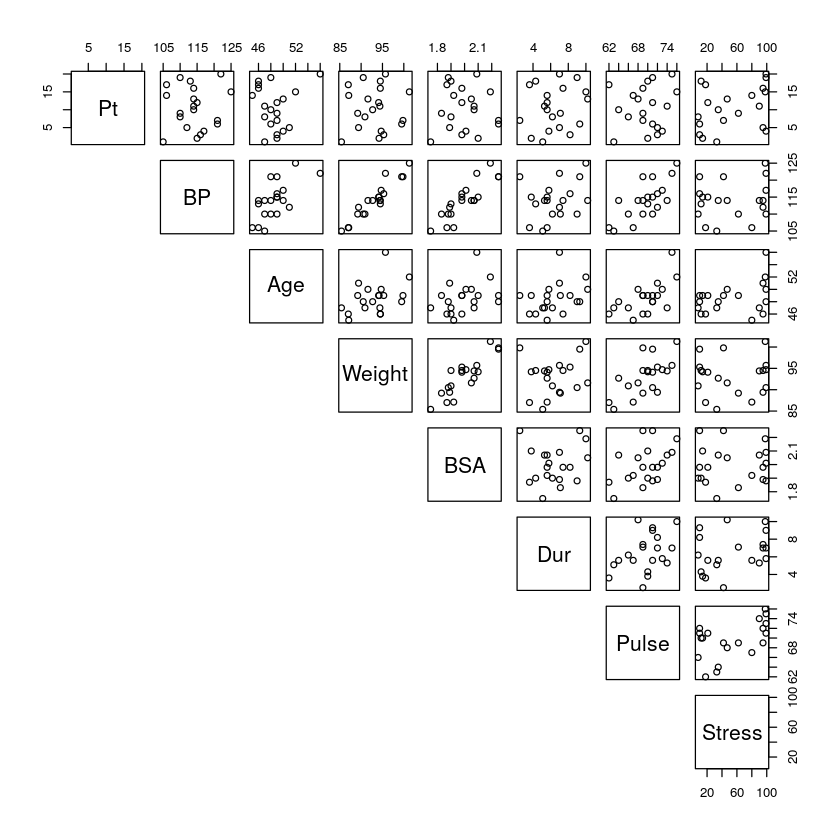

In [138]:
X <- read.csv("./data/bloodpress.txt",sep="\t")[.2:9]
head(X)
cor(X)
pairs(X,lower.panel = NULL)

In [137]:
model <- lm(BP ~ Weight + Age, data=X)
summary(model)
anova(model)


Call:
lm(formula = BP ~ Weight + Age, data = X)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89968 -0.35242  0.06979  0.35528  0.82781 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -16.57937    3.00746  -5.513 3.80e-05 ***
Weight        1.03296    0.03116  33.154  < 2e-16 ***
Age           0.70825    0.05351  13.235 2.22e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5327 on 17 degrees of freedom
Multiple R-squared:  0.9914,	Adjusted R-squared:  0.9904 
F-statistic: 978.2 on 2 and 17 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Weight,1,505.471984,505.4719840,1781.3338,1.187395e-18
Age,1,49.704089,49.7040893,175.1622,2.217640e-10
Residuals,17,4.823927,0.2837604,NA,NA


Here is another example:

In [113]:
X <- read.csv("data/Advertising.csv")[,2:5]
head(X)

TV,radio,newspaper,sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


,TV,radio,newspaper,sales
TV,1.00000000,0.05480866,0.05664787,0.7822244
radio,0.05480866,1.00000000,0.35410375,0.5762226
newspaper,0.05664787,0.35410375,1.00000000,0.2282990
sales,0.78222442,0.57622257,0.22829903,1.0000000


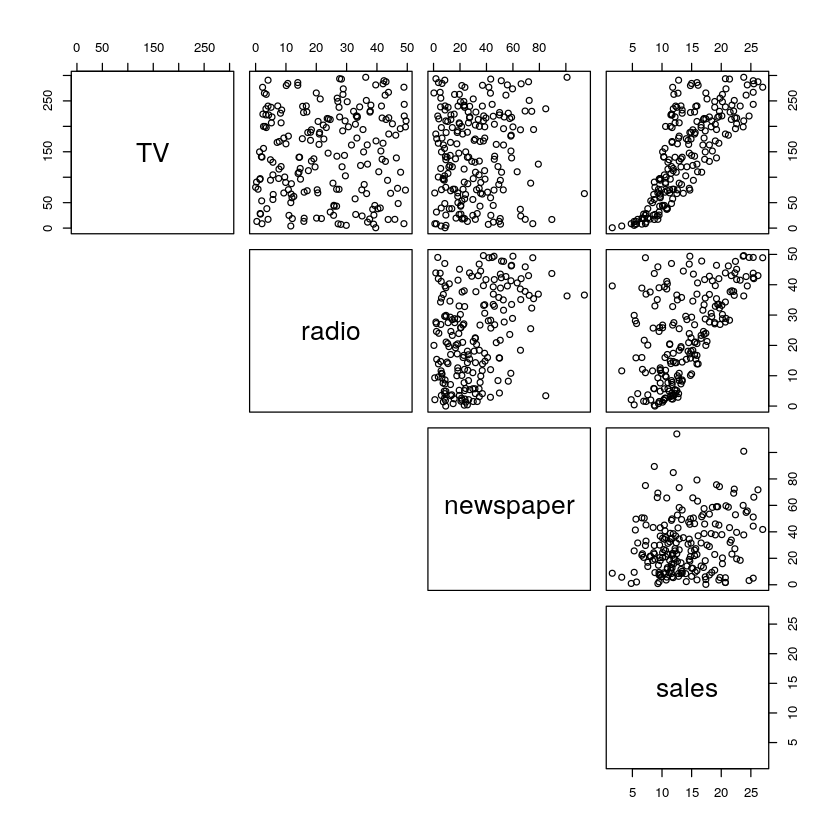

In [114]:
pairs(X,lower.panel = NULL)
cor(X)

In [105]:
model <- lm(sales ~ . , data=X)
summary(model)
anova(model)


Call:
lm(formula = sales ~ ., data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
radio        0.188530   0.008611  21.893   <2e-16 ***
newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
TV,1,3.314618e+03,3.314618e+03,1.166731e+03,1.809337e-84
radio,1,1.545617e+03,1.545617e+03,5.440501e+02,1.882722e-58
newspaper,1,8.871717e-02,8.871717e-02,3.122805e-02,8.599151e-01
Residuals,196,5.568253e+02,2.840945e+00,NA,NA


In [104]:
model <- lm(sales ~ TV + radio , data=X)
summary(model)
anova(model)


Call:
lm(formula = sales ~ TV + radio, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7977 -0.8752  0.2422  1.1708  2.8328 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.92110    0.29449   9.919   <2e-16 ***
TV           0.04575    0.00139  32.909   <2e-16 ***
radio        0.18799    0.00804  23.382   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.681 on 197 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8962 
F-statistic: 859.6 on 2 and 197 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
TV,1,3314.618,3314.618167,1172.4967,6.937160e-85
radio,1,1545.617,1545.616603,546.7388,9.776972e-59
Residuals,197,556.914,2.826975,NA,NA


## Interaction effect

In [103]:
model <- lm(sales ~ TV * radio , data=X)
summary(model)
anova(model)


Call:
lm(formula = sales ~ TV * radio, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3366 -0.4028  0.1831  0.5948  1.5246 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.750e+00  2.479e-01  27.233   <2e-16 ***
TV          1.910e-02  1.504e-03  12.699   <2e-16 ***
radio       2.886e-02  8.905e-03   3.241   0.0014 ** 
TV:radio    1.086e-03  5.242e-05  20.727   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9435 on 196 degrees of freedom
Multiple R-squared:  0.9678,	Adjusted R-squared:  0.9673 
F-statistic:  1963 on 3 and 196 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
TV,1,3314.6182,3314.6181669,3723.3641,1.871751e-129
radio,1,1545.6166,1545.6166031,1736.2161,2.431498e-99
TV:radio,1,382.4306,382.4305974,429.5905,2.757681e-51
Residuals,196,174.4834,0.8902213,NA,NA


## Regression with categorical variables

For details on this section, please check [Pen State's STAT 501 Course Notes](https://onlinecourses.science.psu.edu/stat501/node/380/)

Wgt,Gest,Smoke
2940,38,yes
3130,38,no
2420,36,yes
2450,34,no
2760,39,yes
2440,35,yes


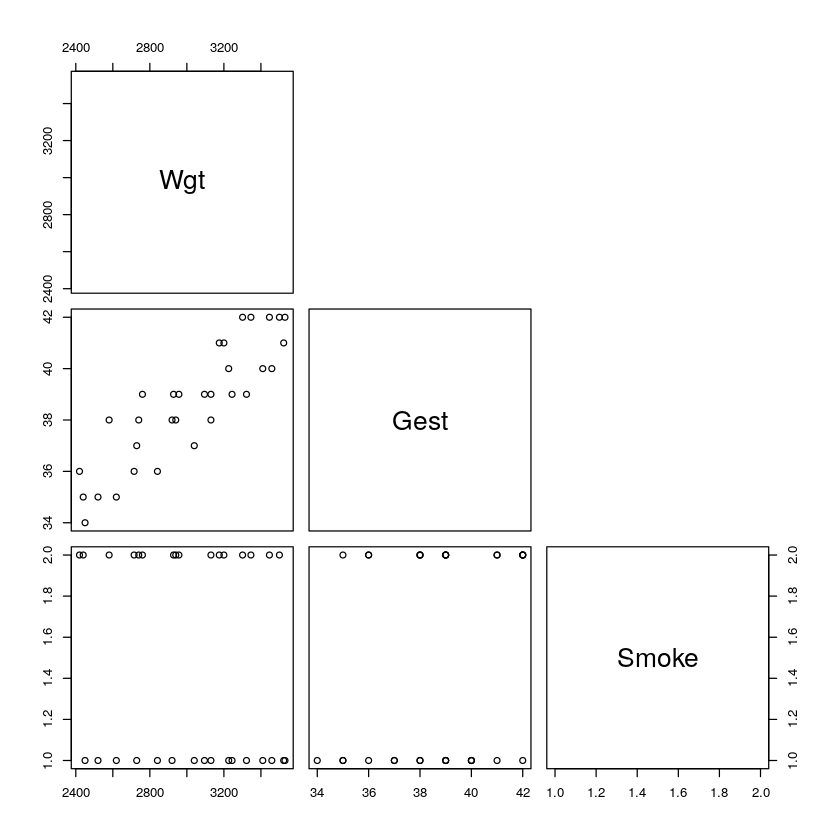

In [170]:
X <- read.csv("data/birthsmokers.txt",sep="\t")
head(X)
pairs(X, upper.panel = NULL)

In [166]:
model <- glm(Wgt ~ . , data=X)
summary(model)
anova(model)


Call:
glm(formula = Wgt ~ ., data = X)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-223.693   -92.063    -9.365    79.663   197.507  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2389.573    349.206  -6.843 1.63e-07 ***
Gest          143.100      9.128  15.677 1.07e-15 ***
Smokeyes     -244.544     41.982  -5.825 2.58e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 13347.24)

    Null deviance: 3735790  on 31  degrees of freedom
Residual deviance:  387070  on 29  degrees of freedom
AIC: 399.63

Number of Fisher Scoring iterations: 2


,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,31,3735789.5
Gest,1,2895838.5,30,839951.0
Smoke,1,452881.2,29,387069.8


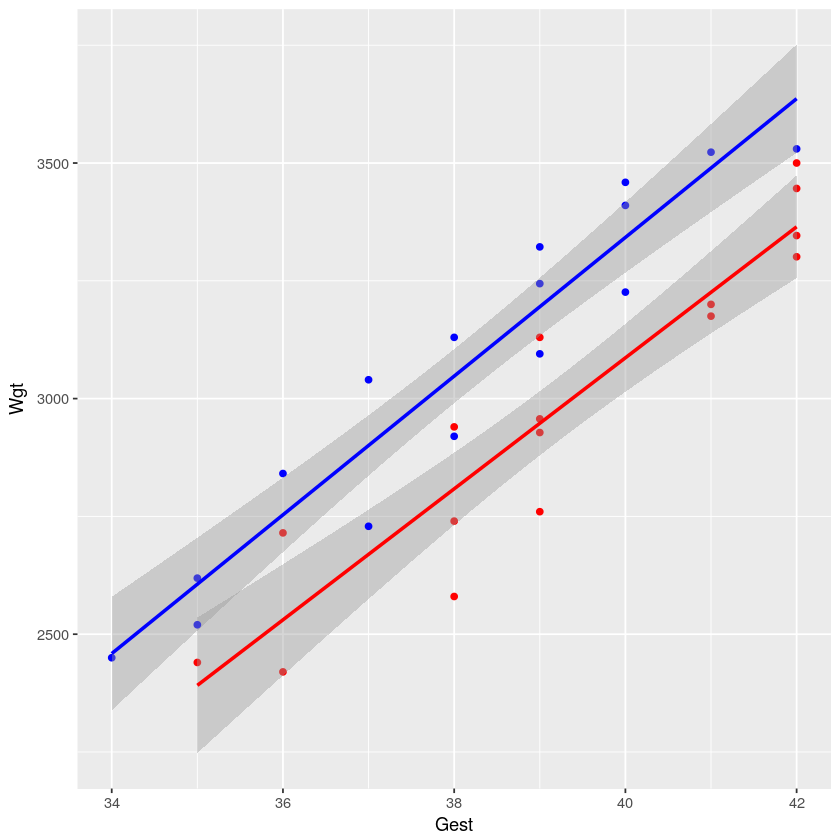

In [169]:
Smokers <- subset(X,X$Smoke == 'yes')
NonSmokers <- subset(X,X$Smoke == 'no')
ggplot(Smokers,aes(Gest,Wgt)) + 
      geom_point(color="red") +
      stat_smooth(method="lm", color="red") +
      geom_point(data = NonSmokers, aes(Gest,Wgt), color="blue") + 
      stat_smooth(data = NonSmokers, method="lm", color="blue")